## Rainfall in Pakistan (1901–2016) - Exploratory Data Analysis


# Importing libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

# 1. Load Dataset

In [ ]:

data = pd.read_csv('rainfall_1901_2016_pak.csv')

# Clean column names

In [ ]:

data.rename(columns={'Rainfall - (MM)': 'Rainfall_mm', ' Year': 'Year'}, inplace=True)

# Preview dataset

In [ ]:

print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (1392, 3)


,Rainfall_mm,Year,Month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


# 2. Basic Information

In [ ]:

print("\nDataset Info:")
print(data.info())
print("\nMissing Values per Column:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rainfall_mm  1392 non-null   float64
 1   Year         1392 non-null   int64  
 2   Month        1392 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 32.8+ KB
None

Missing Values per Column:
Rainfall_mm    0
Year           0
Month          0
dtype: int64


# 3. Exploratory Data Analysis

## Average rainfall by year

In [7]:
annual_rainfall = data.groupby("Year")["Rainfall_mm"].sum().reset_index()

fig = px.line(
    annual_rainfall, x="Year", y="Rainfall_mm",
    title="Annual Rainfall in Pakistan (1901–2016)",
    labels={"Rainfall_mm": "Total Rainfall (mm)", "Year": "Year"}
)
fig.show()

## Rainfall distribution by month (boxplot)

In [9]:
fig = px.box(
    data, x="Month", y="Rainfall_mm", 
    title="Monthly Rainfall Distribution (1901–2016)",
    color="Month"
)
fig.show()

# 4. Rainfall Trends for Key Months (June, July, August)

## Function to plot rainfall trends for specific months

In [12]:
def plot_month_trend(month, start, end):
    subset = data[(data["Year"] >= start) & (data["Year"] <= end) & (data["Month"] == month)]
    fig = px.line(
        subset, x="Year", y="Rainfall_mm", color="Month", text="Rainfall_mm",
        title=f"Rainfall in {month} ({start}-{end})"
    )
    fig.update_traces(texttemplate='%{text:.2f}', textposition='top center')
    fig.show()

## June rainfall comparison before vs after 2000

In [13]:
plot_month_trend("June", 1980, 2000)
plot_month_trend("June", 2001, 2016)

## July rainfall comparison

In [14]:
plot_month_trend("July", 1980, 2000)
plot_month_trend("July", 2001, 2016)

## August rainfall comparison

In [15]:
plot_month_trend("August", 1980, 2000)
plot_month_trend("August", 2001, 2016)

# 5. Seasonal Rainfall Analysis

## Define seasons

In [16]:
seasons = {
    "Winter": ["December", "January", "February"],
    "Summer": ["June", "July", "August"],
    "Spring": ["March", "April", "May"],
    "Autumn": ["September", "October", "November"]
}

## Map each month to a season

In [17]:
month_to_season = {}
for season, months in seasons.items():
    for m in months:
        month_to_season[m] = season

data["Season"] = data["Month"].map(month_to_season)


## Aggregate seasonal rainfall

In [25]:
seasonal_rainfall = data.groupby(["Year", "Season"])["Rainfall_mm"].sum().reset_index()

fig = px.line(
    seasonal_rainfall, x="Year", y="Rainfall_mm", color="Season",
    title="Seasonal Rainfall Trends (1901–2016)",
    labels={"Rainfall_mm": "Rainfall (mm)"}
)
fig.show()

# 6. Rainfall Heatmap (Year vs Month)

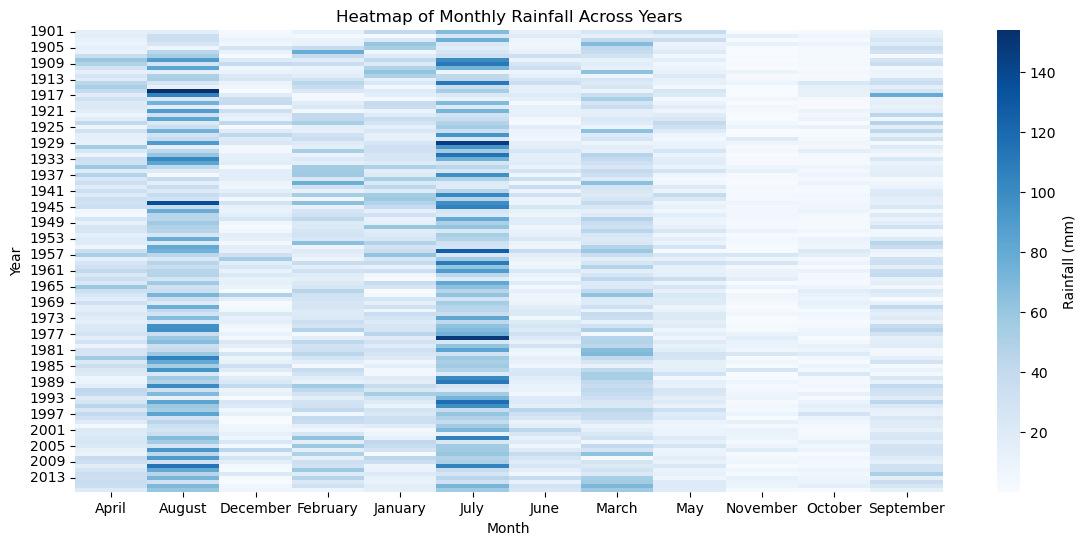

In [20]:
pivot = data.pivot_table(index="Year", columns="Month", values="Rainfall_mm", aggfunc="sum")

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="Blues", cbar_kws={'label': 'Rainfall (mm)'})
plt.title("Heatmap of Monthly Rainfall Across Years")
plt.show()

# 7. Hypothesis Testing

## Hypothesis: Rainfall after 2000 is significantly different from rainfall before 2000?

In [22]:
before_2000 = annual_rainfall[annual_rainfall["Year"] < 2000]["Rainfall_mm"]
after_2000 = annual_rainfall[annual_rainfall["Year"] >= 2000]["Rainfall_mm"]

t_stat, p_val = stats.ttest_ind(before_2000, after_2000)

print("\nHypothesis Testing (Before 2000 vs After 2000)")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Significant difference in rainfall before and after 2000.")
else:
    print("No significant difference in rainfall before and after 2000.")


Hypothesis Testing (Before 2000 vs After 2000)
T-statistic: -0.2884551231074585
P-value: 0.7735222001256075
No significant difference in rainfall before and after 2000.


# 8. Pie Chart of Rainfall Contribution (2000–2016)

In [24]:
sel = data[data["Year"] >= 2000]
fig = px.pie(
    sel, values="Rainfall_mm", names="Year", hole=0.5,
    title="Rainfall Contribution by Year (2000–2016)"
)
fig.show()